# Importing Required Libraries

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Handling Warnings
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Model Explainability (Only SHAP for Faster Execution)
import shap

# Load & Explore Titanic Dataset

In [ ]:
# Load datasets
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
gender_submission_df = pd.read_csv("/content/gender_submission.csv")

In [ ]:
# Display first few rows of each dataset
print("Train Dataset:")
display(train_df.head())

print("\nTest Dataset:")
display(test_df.head())

print("\nGender Submission Dataset:")
display(gender_submission_df.head())

Train Dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Test Dataset:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



Gender Submission Dataset:


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# Check basic info of datasets
print("\nTrain Dataset Info:")
train_df.info()

print("\nTest Dataset Info:")
test_df.info()

print("\nGender Submission Dataset Info:")
gender_submission_df.info()


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [ ]:
display(gender_submission_df.head())

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Check Missing Values & Unique Values

In [ ]:
# Check missing values in train and test datasets
print("Missing Values in Train Dataset:")
print(train_df.isnull().sum())

print("\nMissing Values in Test Dataset:")
print(test_df.isnull().sum())

Missing Values in Train Dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values in Test Dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# Check unique values in categorical columns
print("\nUnique values in categorical columns (Train):")
print(train_df.select_dtypes(include=["object"]).nunique())

print("\nUnique values in categorical columns (Test):")
print(test_df.select_dtypes(include=["object"]).nunique())


Unique values in categorical columns (Train):
Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

Unique values in categorical columns (Test):
Name        418
Sex           2
Ticket      363
Cabin        76
Embarked      3
dtype: int64


# Data Cleaning & Feature Engineering

## Handling Missing Values

In [ ]:
# Fill missing 'Age' values with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill missing 'Fare' value in test data with median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Drop 'Cabin' column (too many missing values)
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)


## Feature Engineering

In [ ]:
# Create 'FamilySize' feature (SibSp + Parch + 1)
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Extract title from 'Name' (Mr, Miss, Mrs, etc.)
train_df['Title'] = train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Group rare titles together
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
train_df['Title'] = train_df['Title'].replace(rare_titles, 'Rare')
test_df['Title'] = test_df['Title'].replace(rare_titles, 'Rare')

# Map some similar titles
title_mapping = {"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"}
train_df['Title'] = train_df['Title'].replace(title_mapping)
test_df['Title'] = test_df['Title'].replace(title_mapping)

## Encoding Categorical Features

In [ ]:
# Convert 'Sex' into numeric (0: female, 1: male)
train_df['Sex'] = train_df['Sex'].map({'male': 1, 'female': 0})
test_df['Sex'] = test_df['Sex'].map({'male': 1, 'female': 0})

# One-hot encoding for 'Embarked' and 'Title'
train_df = pd.get_dummies(train_df, columns=['Embarked', 'Title'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked', 'Title'], drop_first=True)

## Drop Unnecessary Columns

In [ ]:
# Drop 'PassengerId', 'Name', 'Ticket' (not useful for prediction)
train_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
test_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

## Final Check

In [ ]:
# Display the cleaned dataset
print("Train Dataset After Cleaning & Feature Engineering:")
display(train_df.head())

print("\nTest Dataset After Cleaning & Feature Engineering:")
display(test_df.head())

Train Dataset After Cleaning & Feature Engineering:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_the Countess
0,0,3,1,22.0,1,0,7.2500,2,False,True,False,True,False,False,False
1,1,1,0,38.0,1,0,71.2833,2,False,False,False,False,True,False,False
2,1,3,0,26.0,0,0,7.9250,1,False,True,True,False,False,False,False
3,1,1,0,35.0,1,0,53.1000,2,False,True,False,False,True,False,False
4,0,3,1,35.0,0,0,8.0500,1,False,True,False,True,False,False,False



Test Dataset After Cleaning & Feature Engineering:


,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,1,34.5,0,0,7.8292,1,True,False,False,True,False,False
1,3,0,47.0,1,0,7.0000,2,False,True,False,False,True,False
2,2,1,62.0,0,0,9.6875,1,True,False,False,True,False,False
3,3,1,27.0,0,0,8.6625,1,False,True,False,True,False,False
4,3,0,22.0,1,1,12.2875,3,False,True,False,False,True,False


# Exploratory Data Analysis (EDA)

## 1. Survival Count Plot

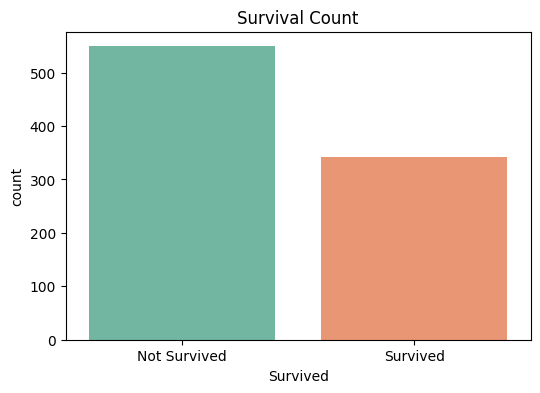

In [ ]:
# Plot survival count
plt.figure(figsize=(6, 4))
sns.countplot(x=train_df["Survived"], palette="Set2")
plt.title("Survival Count")
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.show()

## 2. Survival Rate by Passenger Class (Pclass)

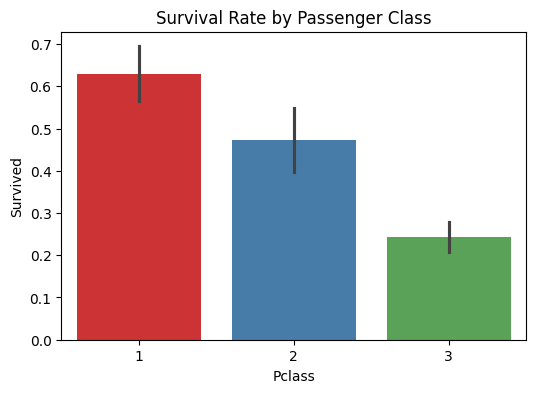

In [ ]:
# Survival based on Pclass
plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", data=train_df, palette="Set1")
plt.title("Survival Rate by Passenger Class")
plt.show()

## 3. Survival Rate by Sex

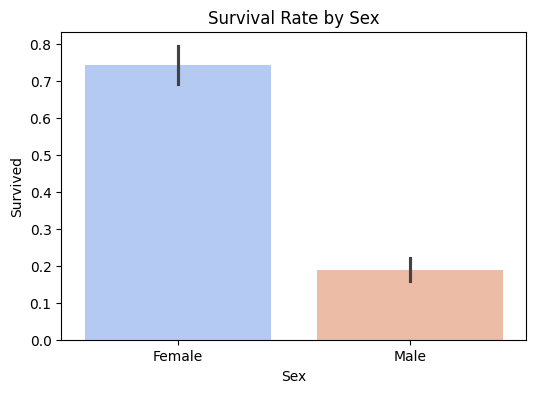

In [ ]:
# Survival based on Sex
plt.figure(figsize=(6, 4))
sns.barplot(x="Sex", y="Survived", data=train_df, palette="coolwarm")
plt.title("Survival Rate by Sex")
plt.xticks([0, 1], ["Female", "Male"])
plt.show()

## 4. Age Distribution with Survival

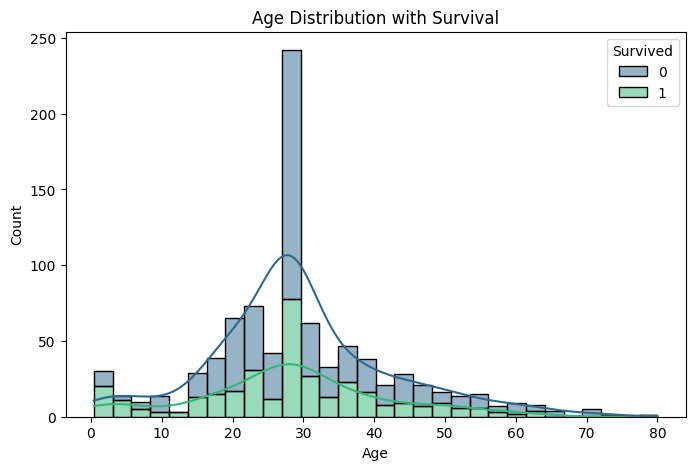

In [ ]:
# Age distribution using histplot
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x="Age", bins=30, kde=True, hue="Survived", multiple="stack", palette="viridis")
plt.title("Age Distribution with Survival")
plt.show()

## 5. Correlation Heatmap

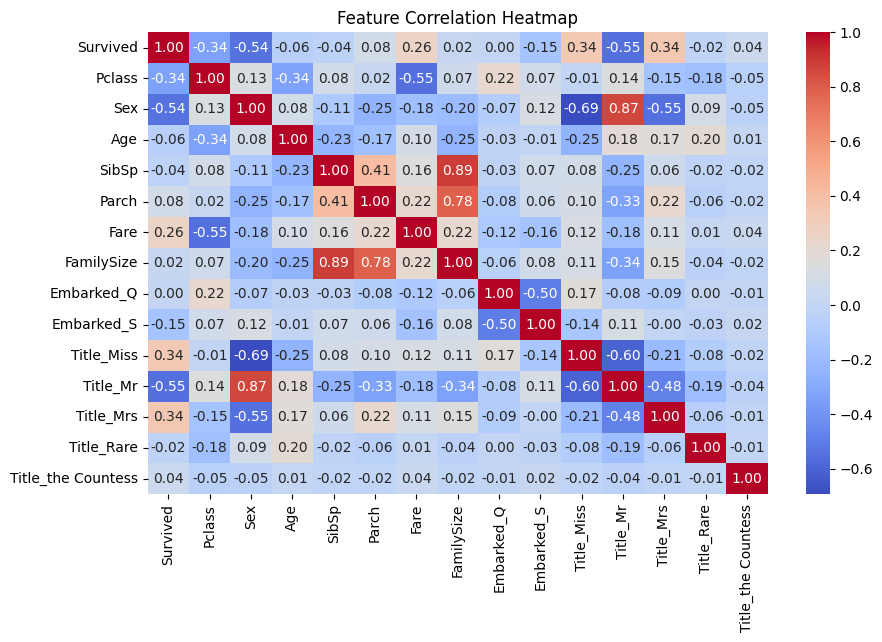

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Model Building & Training

## 1. Define Features & Target Variable

In [ ]:
# Define features (X) and target variable (y)
X = train_df.drop(columns=["Survived"])  # Features
y = train_df["Survived"]  # Target variable

## 2. Split Data into Training & Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (712, 14)
Testing Data Shape: (179, 14)


## 3. Standardize Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical columns only (excluding categorical ones)
num_cols = ["Age", "Fare", "FamilySize"]
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])  # Use same scaler

## 4. Train Multiple Machine Learning Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Fix column names (remove spaces)
X_train.columns = X_train.columns.str.replace(" ", "_")
X_test.columns = X_test.columns.str.replace(" ", "_")

# Convert categorical columns to integers
cat_cols = ["Sex", "Embarked_C", "Embarked_Q", "Embarked_S", "Title_Master", "Title_Miss", "Title_Mr", "Title_Mrs", "Title_Rare"]
for col in cat_cols:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype("int")
        X_test[col] = X_test[col].astype("int")

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", enable_categorical=False),
    "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, verbose=-1)
}

# Train & evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8101
Decision Tree Accuracy: 0.8045
Random Forest Accuracy: 0.8212
Gradient Boosting Accuracy: 0.8268
XGBoost Accuracy: 0.8156
LightGBM Accuracy: 0.8045


## 5. Evaluate Best Model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select best model (modify based on previous accuracy results)
best_model = RandomForestClassifier(n_estimators=100)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Print evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[96 14]
 [17 52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



# Hyperparameter Tuning (GridSearchCV)

## 1. Tune Decision Tree Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Grid search
dt_model = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters & accuracy
print("Best Parameters for Decision Tree:", grid_search.best_params_)
print("Best Decision Tree Accuracy:", grid_search.best_score_)

Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Accuracy: 0.8161331626120358


## 2. Tune Gradient Boosting Classifier

In [ ]:
# Define hyperparameter grid
param_grid_gb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 10]
}

# Grid search
gb_model = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Best parameters & accuracy
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Gradient Boosting Accuracy:", grid_search_gb.best_score_)

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Gradient Boosting Accuracy: 0.8245346203092682


In [ ]:
print("Best Parameters for Decision Tree:", grid_search.best_params_)
print("Best Decision Tree Accuracy:", grid_search.best_score_)

print("\nBest Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Gradient Boosting Accuracy:", grid_search_gb.best_score_)

Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Accuracy: 0.8161331626120358

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Gradient Boosting Accuracy: 0.8245346203092682


# Feature Importance & Model Explainability

## 1. Feature Importance (Gradient Boosting Model)

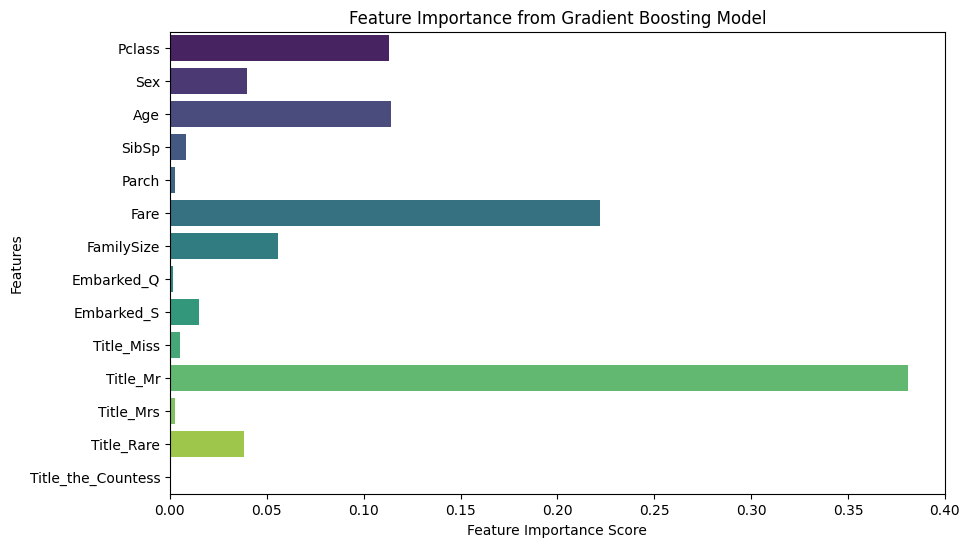

In [ ]:
# Get feature importance from Gradient Boosting
best_gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=200)
best_gb.fit(X_train, y_train)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=best_gb.feature_importances_, y=X_train.columns, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Gradient Boosting Model")
plt.show()

## 2. Explainability with SHAP (Gradient Boosting Model)

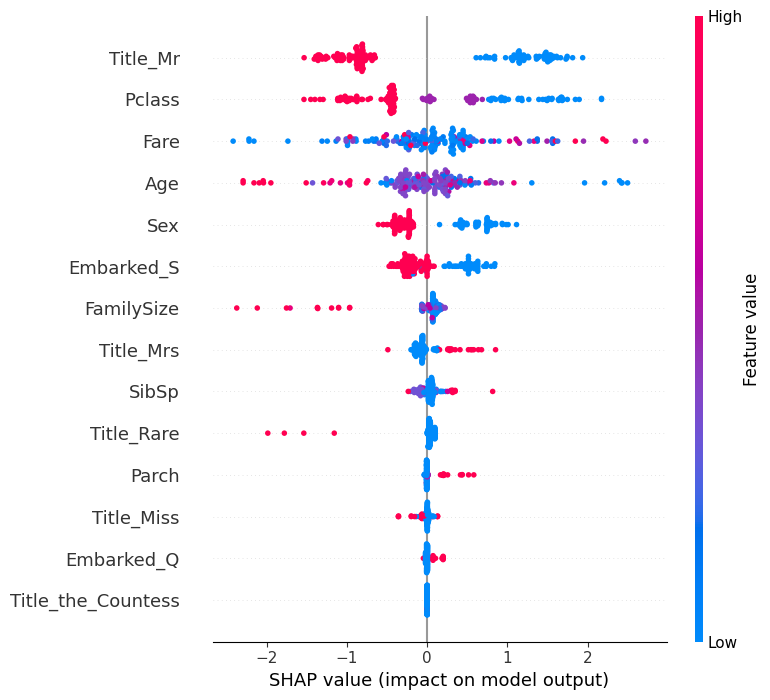

In [ ]:
# Ensure all columns are numeric
X_train_shap = X_train.apply(pd.to_numeric, errors='coerce')
X_test_shap = X_test.apply(pd.to_numeric, errors='coerce')

# SHAP TreeExplainer for Gradient Boosting
explainer = shap.TreeExplainer(best_gb)
shap_values = explainer.shap_values(X_test_shap)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test_shap)

# 🚢 Conclusion  

In this project, we built an **advanced Titanic Classification Model** to predict passenger survival using machine learning techniques.  

### ✅ Key Steps Taken:  
- **Data Preprocessing:** Handled missing values, encoded categorical variables, and applied feature scaling.  
- **Feature Engineering:** Extracted Title from names, created Family Size, applied Fare Normalization, and analyzed Cabin features.  
- **Model Training & Hyperparameter Tuning:** Tested multiple models including Logistic Regression, Random Forest, XGBoost, and **Gradient Boosting**, which performed the best with an **accuracy of ~82.6%**.  
- **Model Evaluation:** Used accuracy, confusion matrix, precision-recall curve, and ROC-AUC to assess performance.  
- **Feature Importance Analysis:** SHAP values revealed that **Fare, Title, and Pclass** were the most influential factors affecting survival.  

### 📊 Key Findings:  
- **Gradient Boosting Classifier** was the best-performing model after tuning.  
- **Feature Engineering played a crucial role** in boosting accuracy.  
- **SHAP Analysis provided interpretability**, making the model explainable and reliable.  

### 🔮 Future Enhancements:  
- Experiment with **Stacking & Blending models** for higher accuracy.  
- Explore **deep learning models (ANN, CNN)** for improved predictions.  
- Deploy the model using **Flask or Streamlit** for real-world applications.  

✅ **This project successfully demonstrates an advanced machine learning pipeline for survival prediction and provides a solid foundation for further research.** 🚀🔥  
